In [1]:
import numpy as np
import matplotlib.pyplot as plt
from aeons.endpoint import EndModel
from aeons.likelihoods import middle, full
from aeons.tools import proj_dir, aeons_dir
from aeons.toy_samples import gaussian_samples

In [2]:
format = {
    # Use LaTeX to write all text
    "text.usetex": True,
    "font.family": "serif",
    # Use 9pt font in plots, to match 9pt font in document
    "axes.labelsize": 9,
    "font.size": 9,
    # Make the legend/label fonts a little smaller
    "legend.fontsize": 7,
    "xtick.labelsize": 7,
    "ytick.labelsize": 7,
    'axes.linewidth': 0.5,
    'axes.spines.top': False,
    'axes.spines.right': False,
    'patch.linewidth': 0.5,
    'legend.fancybox': False,
    'legend.shadow': False,
}
plt.rcParams.update(format)

In [7]:
samples = gaussian_samples(nlive=50, ndims=2, sigma=0.1, seed=100)
logXarray = np.linspace(-10, 0, 100)
Xarray = np.exp(logXarray)
logLarray = middle.func(Xarray, [2, 0.1])
Larray = np.exp(logLarray)

### Know L(X)

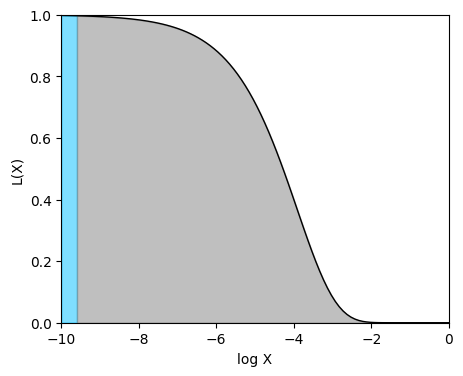

In [133]:
stop = 5
plt.figure(figsize=(5, 4))
plt.plot(logXarray, Larray, lw=1, color='k')
plt.fill_between(logXarray[:stop], 0, Larray[:stop], alpha=.5, color='deepskyblue')
plt.fill_between(logXarray[stop-1:], 0, Larray[stop-1:], alpha=.5, color='gray')
plt.xlim(-10, 0)
plt.ylim(0, 1)
plt.yticks();
plt.xlabel('log X')
plt.ylabel('L(X)')
plt.savefig(f'{home_dir}/../talk/Figures/know_L.pdf', format='pdf', bbox_inches='tight')

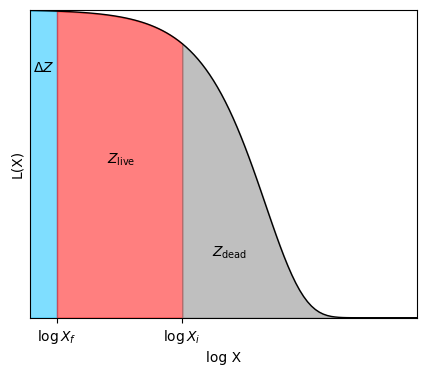

In [178]:
kf = 8
ki = 40
plt.figure(figsize=(5, 4))
plt.plot(logXarray, Larray, lw=1, color='k')
plt.fill_between(logXarray[:kf], 0, Larray[:kf], alpha=.5, color='deepskyblue')
plt.fill_between(logXarray[kf-1:ki], 0, Larray[kf-1:ki], alpha=.5, color='red')
plt.fill_between(logXarray[ki-1:], 0, Larray[ki-1:], alpha=.5, color='gray')
plt.xlim(-10, 0)
plt.ylim(0, 1)
plt.xticks([logXarray[kf-1], logXarray[ki-1]], ['$\log X_f$', '$\log X_i$']);
plt.yticks([]);
plt.xlabel('log X')
plt.ylabel('L(X)')
plt.text(x=-9.9, y=0.8, s='$\Delta Z$')
plt.text(x=-8, y=0.5, s='$Z_\mathrm{live}$')
plt.text(x=-5.3, y=0.2, s='$Z_\mathrm{dead}$')
plt.savefig(f'{home_dir}/../talk/Figures/termination_condition.pdf', format='pdf', bbox_inches='tight')

### Samples of X

In [8]:
iteration = 300
points = samples.iloc[:iteration]
logL = points.logL
L = np.exp(points.logL)
nk = points.nlive

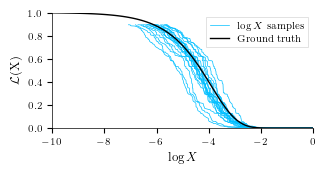

In [16]:
from aeons.true_distribution import generate_Xs
plt.figure(figsize=(3.37, 1.5))
for i in range(20):
    X = generate_Xs(nk)
    logX = np.log(X)
    plt.plot(logX, L, lw=.5, color='deepskyblue')
plt.plot(logX, L, lw=.5, color='deepskyblue', label='$\log X$ samples')
plt.plot(logXarray, Larray, lw=1, color='k', label='Ground truth')
plt.xlim(-10, 0)
plt.ylim(0, 1)
plt.xlabel('$\log X$')
plt.ylabel('$\mathcal{L}$(X)')
plt.legend(frameon=True)
plt.savefig(f'{proj_dir}/paper/Figures/X_samples.pdf', backend='pdf', bbox_inches='tight')

### **Gaussian points**

In [24]:
ndead_last = 25
points = samples[samples.logL_birth < samples.iloc[ndead_last].logL]
points = points.recompute()
dead_points = points.iloc[:ndead_last]
live_points = points.iloc[ndead_last:]
latest_dead = points.iloc[ndead_last]
latest_live = points.iloc[-1]
r_latest = np.sqrt(latest_dead[0]**2 + latest_dead[1]**2)
r_live = np.sqrt(latest_live[0]**2 + latest_live[1]**2)

from scipy.stats import multivariate_normal
N = 200
X = np.linspace(-1, 1, N)
Y = np.linspace(-1, 1, N)
X, Y = np.meshgrid(X, Y)
pos = np.dstack((X, Y))
rv = multivariate_normal([0, 0], [[0.1**2, 0], [0, 0.1**2]])
Z = rv.pdf(pos)

/home/zixiao/Documents/III/project/env/lib/python3.10/site-packages/anesthetic/labelled_pandas.py:22: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  results.append((f(*args), l))


/tmp/ipykernel_36453/1644403086.py:3: UserWarning: The following kwargs were not used by contour: 'label'
  ax1.contourf(X, Y, Z, levels=100, cmap='Blues', label='Likelihood')


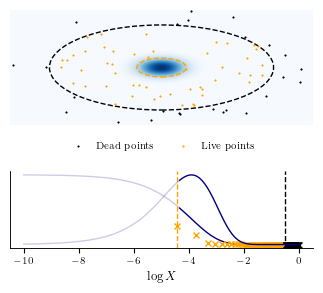

In [62]:
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(3.3, 3), gridspec_kw={'height_ratios': [1.5, 1]})

ax1.contourf(X, Y, Z, levels=100, cmap='Blues', label='Likelihood')
circle1 = plt.Circle((0, 0), r_latest, fill=False, lw=1, ls='--', color='black')
circle2 = plt.Circle((0, 0), r_live, fill=False, lw=1, ls='--', color='orange')
ax1.add_patch(circle1)
ax1.add_patch(circle2)
ax1.scatter(dead_points[0], dead_points[1], s=1, color='black', label='Dead points')
ax1.scatter(live_points[0], live_points[1], s=1, color='orange', label='Live points')
ax1.set_xticks([])
ax1.set_yticks([])
ax1.axis('off')
ax1.legend(loc='lower center', ncols=3, bbox_to_anchor=(0.5, -0.3))

ax3 = plt.twinx(ax2)
stop = 57
ax2.plot(logXarray[:stop], Larray[:stop], lw=1, alpha=.2, color='navy')
ax3.plot(logXarray[:stop], (Larray*Xarray)[:stop], lw=1, alpha=.2, color='navy')
ax2.plot(logXarray[stop-1:], Larray[stop-1:], lw=1, color='navy')
ax3.plot(logXarray[stop-1:], (Larray*Xarray)[stop-1:], lw=1, color='navy')
ax2.plot(points.logX().iloc[ndead_last:], np.exp(live_points.logL), 'x', ms=5, color='orange')
ax2.plot(dead_points.logX(), np.exp(dead_points.logL), 'x', ms=5, color='black')
ax2.axvline(x=points.logX().iloc[ndead_last], lw=1, ls='--', color='black')
ax2.axvline(x=points.logX().iloc[-1], lw=1, ls='--', color='orange')
ax2.set_xlabel('$\log X$')
ax2.set_yticks([])
ax3.set_yticks([])

fig.tight_layout()
plt.savefig(f'{proj_dir}/paper/Figures/dead_live_points.pdf', format='pdf', bbox_inches='tight')

/home/zixiao/Documents/III/project/env/lib/python3.10/site-packages/anesthetic/labelled_pandas.py:22: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  results.append((f(*args), l))


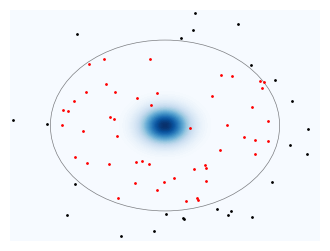

In [8]:
ndead_last = 25
points = samples[samples.logL_birth < samples.iloc[ndead_last].logL]
points = points.recompute()
dead_points = points.iloc[:ndead_last]
live_points = points.iloc[ndead_last:]
latest_dead = points.iloc[ndead_last]
r_latest = np.sqrt(latest_dead[0]**2 + latest_dead[1]**2)

plt.figure(figsize=(4, 3))

from scipy.stats import multivariate_normal
N = 200
X = np.linspace(-1, 1, N)
Y = np.linspace(-1, 1, N)
X, Y = np.meshgrid(X, Y)
pos = np.dstack((X, Y))
rv = multivariate_normal([0, 0], [[0.1**2, 0], [0, 0.1**2]])
Z = rv.pdf(pos)
plt.contourf(X, Y, Z, levels=100, cmap='Blues')

# ndeads = np.arange(0, 25)
# for ndead in ndeads:
#     latest_dead = points.iloc[ndead]
#     r_latest = np.sqrt(latest_dead[0]**2 + latest_dead[1]**2)
#     circle1 = plt.Circle((0, 0), r_latest, fill=False, lw=.5, alpha=.5)
#     plt.gca().add_patch(circle1)

latest_dead = points.iloc[ndead_last]
r_latest = np.sqrt(latest_dead[0]**2 + latest_dead[1]**2)
circle1 = plt.Circle((0, 0), r_latest, fill=False, lw=.5, alpha=.5)
plt.gca().add_patch(circle1)

plt.scatter(dead_points[0], dead_points[1], s=1, color='black')
plt.scatter(live_points[0], live_points[1], s=1, color='red')
plt.xticks([])
plt.yticks([])
plt.box(False)
# plt.savefig(f'{proj_dir}/paper/Figures/dead_live_points.pdf', format='pdf', bbox_inches='tight')

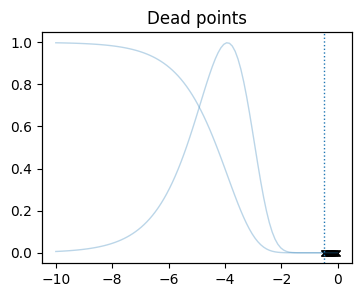

In [135]:
fig, ax = plt.subplots(figsize=(4, 3))
ax1 = plt.twinx(ax)
stop = 100
ax.plot(logXarray[:stop], Larray[:stop], lw=1, alpha=.3)
ax1.plot(logXarray[:stop], (Larray*Xarray)[:stop], lw=1, alpha=.3)
ax.plot(dead_points.logX(), np.exp(dead_points.logL), 'x', ms=5, color='black')
ax.axvline(x=points.logX().iloc[ndead], lw=1, ls=':')
ax1.set_yticks([])
ax.set_title('Dead points')
plt.savefig(f'{home_dir}/../talk/Figures/dead_points_LX.pdf', format='pdf', bbox_inches='tight')

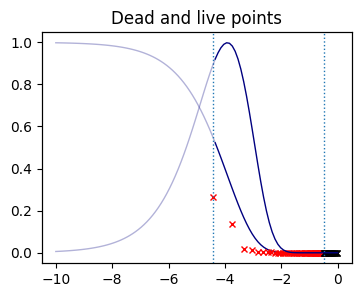

In [136]:
fig, ax = plt.subplots(figsize=(4, 3))
ax1 = plt.twinx(ax)
stop = 57
ax.plot(logXarray[:stop], Larray[:stop], lw=1, alpha=.3, color='navy')
ax1.plot(logXarray[:stop], (Larray*Xarray)[:stop], lw=1, alpha=.3, color='navy')
ax.plot(logXarray[stop-1:], Larray[stop-1:], lw=1, color='navy')
ax1.plot(logXarray[stop-1:], (Larray*Xarray)[stop-1:], lw=1, color='navy')
ax.plot(points.logX().iloc[ndead_last:], np.exp(live_points.logL), 'x', ms=5, color='red')
ax.plot(dead_points.logX(), np.exp(dead_points.logL), 'x', ms=5, color='black')
ax.axvline(x=points.logX().iloc[ndead], lw=1, ls=':')
ax.axvline(x=points.logX().iloc[-1], lw=1, ls=':')
ax1.set_yticks([])
ax.set_title('Dead and live points')
plt.savefig(f'{home_dir}/../talk/Figures/dead_live_points_LX.pdf', format='pdf', bbox_inches='tight')

/home/zixiao/Documents/III/project/env/lib/python3.10/site-packages/anesthetic/labelled_pandas.py:22: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  results.append((f(*args), l))


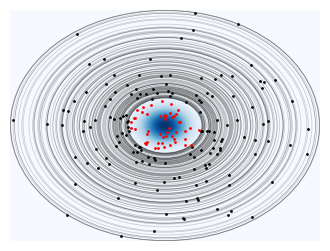

In [111]:
ndead_last = 150
points = samples[samples.logL_birth < samples.iloc[ndead_last].logL]
points = points.recompute()
dead_points = points.iloc[:ndead_last]
live_points = points.iloc[ndead_last:]
latest_dead = points.iloc[ndead_last]
r_latest = np.sqrt(latest_dead[0]**2 + latest_dead[1]**2)

plt.figure(figsize=(4, 3))

from scipy.stats import multivariate_normal
N = 200
X = np.linspace(-1, 1, N)
Y = np.linspace(-1, 1, N)
X, Y = np.meshgrid(X, Y)
pos = np.dstack((X, Y))
rv = multivariate_normal([0, 0], [[0.1**2, 0], [0, 0.1**2]])
Z = rv.pdf(pos)
plt.contourf(X, Y, Z, levels=100, cmap='Blues')

ndeads = np.arange(0, ndead_last)
for ndead in ndeads:
    latest_dead = points.iloc[ndead]
    r_latest = np.sqrt(latest_dead[0]**2 + latest_dead[1]**2)
    circle1 = plt.Circle((0, 0), r_latest, fill=False, lw=.5, alpha=.2)
    plt.gca().add_patch(circle1)

plt.scatter(dead_points[0], dead_points[1], s=1, color='black')
plt.scatter(live_points[0], live_points[1], s=1, color='red')
plt.xticks([])
plt.yticks([])
plt.box(False)
plt.savefig(f'{home_dir}/../talk/Figures/dead_live_points_end.pdf', format='pdf')

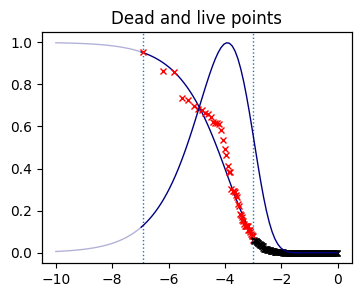

In [120]:
fig, ax = plt.subplots(figsize=(4, 3))
ax1 = plt.twinx(ax)
stop = 31
ax.plot(logXarray[:stop], Larray[:stop], lw=1, alpha=.3, color='navy')
ax1.plot(logXarray[:stop], (Larray*Xarray)[:stop], lw=1, alpha=.3, color='navy')
ax.plot(logXarray[stop-1:], Larray[stop-1:], lw=1, color='navy')
ax1.plot(logXarray[stop-1:], (Larray*Xarray)[stop-1:], lw=1, color='navy')
ax.plot(points.logX().iloc[ndead_last:], np.exp(points.logL.iloc[ndead_last:]), 'x', ms=5, color='red')
ax.plot(dead_points.logX(), np.exp(dead_points.logL), 'x', ms=5, color='black')
ax.axvline(x=points.logX().iloc[ndead_last], lw=1, ls=':')
ax.axvline(x=points.logX().iloc[-1], lw=1, ls=':')
ax1.set_yticks([])
ax.set_title('Dead and live points')
plt.savefig(f'{home_dir}/../talk/Figures/dead_live_points_LX_end.pdf', format='pdf')

#### Live points help